In [1]:
from qutip import *
import numpy as np 
from tqdm import tqdm
import matplotlib.pyplot as plt
import gc

N = 24

Jx_Xedge = 1.0
Jy_Xedge = 1.0
Jz_Xedge = 1.0
Jx_Yedge = 1.0
Jy_Yedge = 1.0
Jz_Yedge = 1.0
Jx_Zedge = 1.0
Jy_Zedge = 1.0
Jz_Zedge = 1.0

Xedges = [[1, 3], [2, 6], [7, 9], [5, 10], [8, 12], [11, 15], [13, 17], [14, 18], [16, 20], [19, 22], [0, 21], [4, 23]]
Yedges = [[0, 1], [2, 4], [3, 7], [6, 8], [10, 11], [12, 13], [15, 16], [18, 19], [20, 21], [22, 23], [5, 9], [14, 17]]
Zedges = [[0, 2], [4, 5], [3, 8], [6, 11], [9, 13], [10, 14], [12, 16], [15, 19], [17, 21], [20, 23], [7, 22], [1, 18]]

def make_op(index, type_op, N):
    op_list = [qeye(2) for _ in range(N)]
    if type_op == 'x':
        op_list[index] = sigmax()
    elif type_op == 'y':
        op_list[index] = sigmay()
    elif type_op == 'z':
        op_list[index] = sigmaz()
    return tensor(op_list)

H = 0

for i,j in Xedges:
    H += Jx_Xedge * make_op(i, "x", N) * make_op(j, "x", N)
    H += Jy_Xedge * make_op(i, "y", N) * make_op(j, "y", N)
    H += Jz_Xedge * make_op(i, "z", N) * make_op(j, "z", N)

    gc.collect()

for i,j in Yedges:
    H += Jx_Yedge * make_op(i, "x", N) * make_op(j, "x", N)
    H += Jy_Yedge * make_op(i, "y", N) * make_op(j, "y", N)
    H += Jz_Yedge * make_op(i, "z", N) * make_op(j, "z", N)

    gc.collect()

for i,j in Zedges:
    H += Jx_Zedge * make_op(i, "x", N) * make_op(j, "x", N)
    H += Jy_Zedge * make_op(i, "y", N) * make_op(j, "y", N)
    H += Jz_Zedge * make_op(i, "z", N) * make_op(j, "z", N)

    gc.collect()

In [2]:
evals, evecs = H.eigenstates(sparse=True, sort='low', eigvals=1, maxiter=1000, tol=1e-8)

In [3]:
evals[0]

np.complex128(-53.32025509451364+1.2576372516639553e-16j)

In [ ]:
from qutip import *
import numpy as np 
from tqdm import tqdm
import matplotlib.pyplot as plt
import gc

N = 14

J1, J2, J3, J4, J5, J6 = 0.012, 0.694, 0.971, 1.000, 0.894, 0.182
Junit = 170.0
gmuB = 1.0 / 0.086 * 0.05788 * 2.0

# N = 14
J1edges = [[1,6],[2,5],[3,6],[4,12],[8,13],[9,12],[10,13],[11,5]]
J2edges = [[1,2],[2,3],[3,4],[4,1],[8,9],[9,10],[10,11],[11,8]]
J3edges = [[2,6],[1,12],[4,6],[3,5],[9,13],[8,5],[11,13],[10,12]]
J4edges = [[1,3],[2,4],[8,10],[9,11]]
J5edges = [[1,7],[2,7],[3,7],[4,7],[8,14],[9,14],[10,14],[11,14]]
J6edges = [[6,12],[5,6],[5,13],[12,13]]

def make_op(index, type_op, N):
    op_list = [qeye(2) for _ in range(N)]
    if type_op == 'x':
        op_list[index] = sigmax()
    elif type_op == 'y':
        op_list[index] = sigmay()
    elif type_op == 'z':
        op_list[index] = sigmaz()
    return tensor(op_list)

H1x = 0
H1y = 0
H1z = 0

for i in range(N):
    H1x += make_op(i, "x", N)
    gc.collect()
    H1y += make_op(i, "y", N)
    gc.collect()
    H1z += make_op(i, "z", N)
    gc.collect()

H2 = 0

def addtermtoH2(J, edges):
    global H2
    for i,j in edges:
        H2 += J * Junit * make_op(i-1, "x", N) * make_op(j-1, "x", N)
        gc.collect()
        H2 += J * Junit * make_op(i-1, "y", N) * make_op(j-1, "y", N)
        gc.collect()
        H2 += J * Junit * make_op(i-1, "z", N) * make_op(j-1, "z", N)
        gc.collect()

addtermtoH2(J1, J1edges)
addtermtoH2(J2, J2edges)
addtermtoH2(J3, J3edges)
addtermtoH2(J4, J4edges)
addtermtoH2(J5, J5edges)
addtermtoH2(J6, J6edges)

def Hcurrent(Bx, By, Bz):
    return H2 - (Bx * gmuB) * H1x - (By * gmuB) * H1y - (Bz * gmuB) * H1z

In [2]:
Bz = np.linspace(0, 400, 401)
Energy_ground = []
TotalMagnetization_ground = []

for b in tqdm(Bz):
    evals, evecs = Hcurrent(Bx=0, By=0, Bz=b).eigenstates(sparse=True, sort='low', eigvals=1, maxiter=1000, tol=1e-8)
    Energy_ground.append(evals[0].real)

    val = 0
    for i in range(N):
        val += expect(make_op(i, "z", N), evecs[0])
        gc.collect()
    
    TotalMagnetization_ground.append(val)


100%|██████████| 401/401 [03:10<00:00,  2.10it/s]


In [3]:
TotalMagnetization_per_7nodes = [x for x in TotalMagnetization_ground]

In [ ]:
with open('TotalMagnetization_per_7nodes.txt', 'w') as file:
    for i in range(len(Bz)):
        file.write(str(Bz[i]) + "\t" + str(TotalMagnetization_per_7nodes[i]) + "\n")

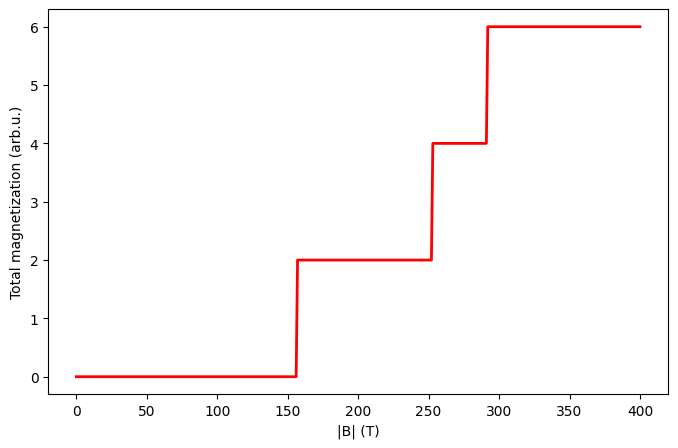

In [5]:
plt.figure(figsize=(8, 5))
plt.plot(Bz, TotalMagnetization_per_7nodes, 'r-', linewidth=2)
plt.xlabel('|B| (T)')
plt.ylabel('Total magnetization (arb.u.)')
plt.show()

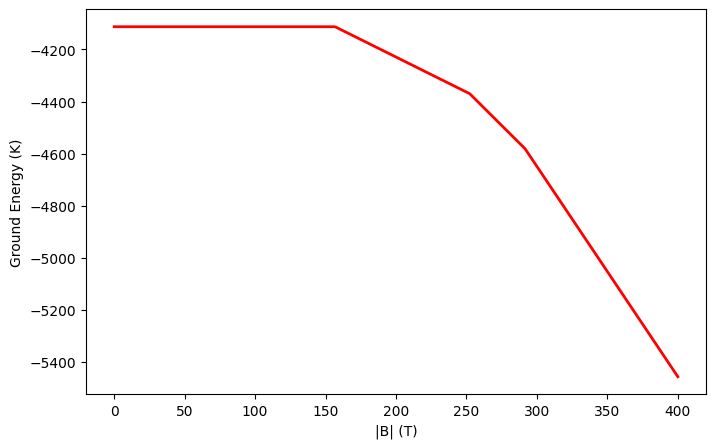

In [6]:
plt.figure(figsize=(8, 5))
plt.plot(Bz, Energy_ground, 'r-', linewidth=2)
plt.xlabel('|B| (T)')
plt.ylabel('Ground Energy (K)')
plt.show()

In [1]:
import qutip as qt
from scipy import sparse
import numpy as np 
from tqdm import tqdm
import matplotlib.pyplot as plt

N = 14

J1, J2, J3, J4, J5, J6 = 0.012, 0.694, 0.971, 1.000, 0.894, 0.182
Junit = 170.0
gmuB = 1.0 / 0.086 * 0.05788 * 2.0

# N = 14
J1edges = [[1,6],[2,5],[3,6],[4,12],[8,13],[9,12],[10,13],[11,5]]
J2edges = [[1,2],[2,3],[3,4],[4,1],[8,9],[9,10],[10,11],[11,8]]
J3edges = [[2,6],[1,12],[4,6],[3,5],[9,13],[8,5],[11,13],[10,12]]
J4edges = [[1,3],[2,4],[8,10],[9,11]]
J5edges = [[1,7],[2,7],[3,7],[4,7],[8,14],[9,14],[10,14],[11,14]]
J6edges = [[6,12],[5,6],[5,13],[12,13]]

# N = 28
#J1edges = [[1,20],[2,5],[3,6],[4,12],[8,27],[9,12],[10,13],[11,5],[15,6],[16,19],[17,20],[18,26],[22,13],[23,26],[24,27],[25,19]]
#J2edges = [[1,2],[2,3],[3,4],[4,1],[8,9],[9,10],[10,11],[11,8],[15,16],[16,17],[17,18],[18,15],[22,23],[23,24],[24,25],[25,22]]
#J3edges = [[2,20],[1,12],[4,6],[3,5],[9,27],[8,5],[11,13],[10,12],[16,6],[15,26],[18,20],[17,19],[23,13],[22,19],[25,27],[24,26]]
#J4edges = [[1,3],[2,4],[8,10],[9,11],[15,17],[16,18],[22,24],[23,25]]
#J5edges = [[1,7],[2,7],[3,7],[4,7],[8,14],[9,14],[10,14],[11,14],[15,21],[16,21],[17,21],[18,21],[22,28],[23,28],[24,28],[25,28]]
#J6edges = [[6,12],[12,20],[20,5],[5,6],[13,5],[5,27],[27,12],[12,13],[20,26],[26,6],[6,19],[19,20],[27,19],[19,13],[13,26],[26,27]]

full_basis = {Mz: [] for Mz in range(N+1)}

for state in range(2**N):
    Mz = 0

    for i in range(N):
        bit = (state >> i) & 1

        if bit == 0:
            Mz += 1
        else:
            Mz -= 1

    if Mz >= 0:
        full_basis[Mz].append(state)

In [2]:
Jedges = J1edges + J2edges + J3edges + J4edges + J5edges + J6edges

Jlist = []

def addJtoJlist(J, num):
    global Jlist
    Jlist += [J for _ in range(num)]

addJtoJlist(J1, len(J1edges))
addJtoJlist(J2, len(J2edges))
addJtoJlist(J3, len(J3edges))
addJtoJlist(J4, len(J4edges))
addJtoJlist(J5, len(J5edges))
addJtoJlist(J6, len(J6edges))

def are_flip_flop_pair(state1, state2):

    diff = state1 ^ state2
   
    diff_count = bin(diff).count('1')

    if diff_count != 2:
        return False, None
    
    diff_positions = []

    for pos in range(N):
        mask = 1 << pos

        if diff & mask:
            diff_positions.append(pos)
    
    i, j = diff_positions[0], diff_positions[1]

    if [i+1, j+1] not in Jedges and [j+1, i+1] not in Jedges:
        return False, None
    
    state1_bit_i = (state1 >> i) & 1
    state1_bit_j = (state1 >> j) & 1

    state2_bit_i = (state2 >> i) & 1
    state2_bit_j = (state2 >> j) & 1
    
    if state1_bit_i == state1_bit_j:
        return False, None
    
    if state2_bit_i == state2_bit_j:
        return False, None
    
    return True, [i+1, j+1]

def applydiagH(J, edges, state):
    result = 0

    for i, j in edges:
        bit_i = (state >> (i-1)) & 1
        bit_j = (state >> (j-1)) & 1

        sign_i = 1.0 if (bit_i == 0) else -1.0
        sign_j = 1.0 if (bit_j == 0) else -1.0

        result += J * Junit * sign_i * sign_j        

    return result

def Ecalc(Bz, Mz, psi1, psi2):
    result = 0
    
    if psi1 == psi2:
        result += applydiagH(J1, J1edges, psi1)
        result += applydiagH(J2, J2edges, psi1)
        result += applydiagH(J3, J3edges, psi1)
        result += applydiagH(J4, J4edges, psi1)
        result += applydiagH(J5, J5edges, psi1)
        result += applydiagH(J6, J6edges, psi1)

        result -= Bz * gmuB * Mz
    
    if psi1 != psi2:
        flag, pair = are_flip_flop_pair(psi1, psi2)
        
        if flag:
            i, j = pair
            id = 0
            try:
                id = Jedges.index([i, j])
            except ValueError:
                try:
                    id = Jedges.index([j, i])
                except ValueError:
                    result = 0

            result = 2 * Jlist[id] * Junit

    return result

In [ ]:
Bzlist = np.linspace(0, 400, 201)
Energy_ground = []
TotalMagnetization_ground = []

for Bz in tqdm(Bzlist):
    groundEn = 10E10
    groundMz = 0

    for Mz in full_basis.keys():
        total_dim = len(full_basis[Mz])

        if total_dim == 0:
            continue

        data = []
        rows = []
        cols = []

        for j in range(total_dim):
            for i in range(total_dim):
                 psi1 = full_basis[Mz][j]
                 psi2 = full_basis[Mz][i]
                 en = Ecalc(Bz, Mz, psi1, psi2)

                 if abs(en) > 0:
                    data.append(en)
                    rows.append(i)
                    cols.append(j)

        data_array = np.array(data, dtype=np.complex128)
        rows_array = np.array(rows, dtype=np.int64)
        cols_array = np.array(cols, dtype=np.int64)

        sparseHblock = sparse.coo_matrix((data_array, (rows_array, cols_array)), shape=(total_dim, total_dim))

        Hqblock = qt.Qobj(sparseHblock, dims=[[total_dim], [total_dim]], isherm=True)

        Hqblock = Hqblock.to("CSR")

        eigenvalues = Hqblock.eigenenergies(sparse=True, sort='low', eigvals=1, tol=1e-8, maxiter=1000)

        if eigenvalues[0] < groundEn:
            groundEn = eigenvalues[0]
            groundMz = Mz

        if eigenvalues[0] > groundEn:
            break
    
    Energy_ground.append(groundEn.real)
    TotalMagnetization_ground.append(groundMz)

100%|██████████| 101/101 [13:31<00:00,  8.04s/it]


In [ ]:
with open('TotalMagnetization.txt', 'w') as file:
    for i in range(len(Bzlist)):
        file.write(str(Bzlist[i]) + "\t" + str(TotalMagnetization_ground[i]) + "\n")

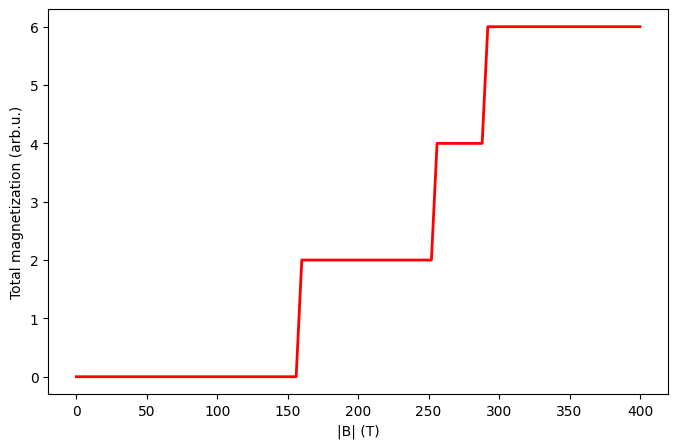

In [4]:
plt.figure(figsize=(8, 5))
plt.plot(Bzlist, TotalMagnetization_ground, 'r-', linewidth=2)
plt.xlabel('|B| (T)')
plt.ylabel('Total magnetization (arb.u.)')
plt.show()

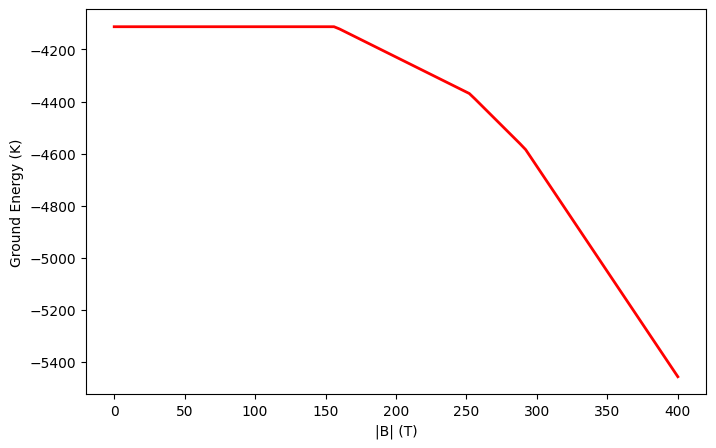

In [5]:
plt.figure(figsize=(8, 5))
plt.plot(Bzlist, Energy_ground, 'r-', linewidth=2)
plt.xlabel('|B| (T)')
plt.ylabel('Ground Energy (K)')
plt.show()